# Imports

In [1]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
data_df = pd.read_csv("../data/medium.in", sep=" ", index_col=None, header=None, names=["source", "target"])

print(data_df.head())

   source  target
0       2       1
1       2      10
2       2      20
3       2      29
4       2      33


# Create networkit graph object

In [3]:
g = nk.Graph(directed=True)

for row in data_df[["source", "target"]].to_records(index=False).tolist():
    g.addEdge(row[0], row[1], addMissing=True)

In [4]:
print("Number of self loops: ", g.numberOfSelfLoops())

Number of self loops:  0


# Question 3.1

In [5]:
print("Number of directed edges: ", g.numberOfEdges())

Number of directed edges:  12864


# Question 3.2

In [6]:
print("Number of users(nodes) in the network: ", g.numberOfNodes())

Number of users(nodes) in the network:  2240


In [7]:
print("Number of connected users(nodes) in the network: ", len(set(data_df["source"].to_list() + data_df["target"].to_list())))

Number of connected users(nodes) in the network:  2239


# Question 3.2

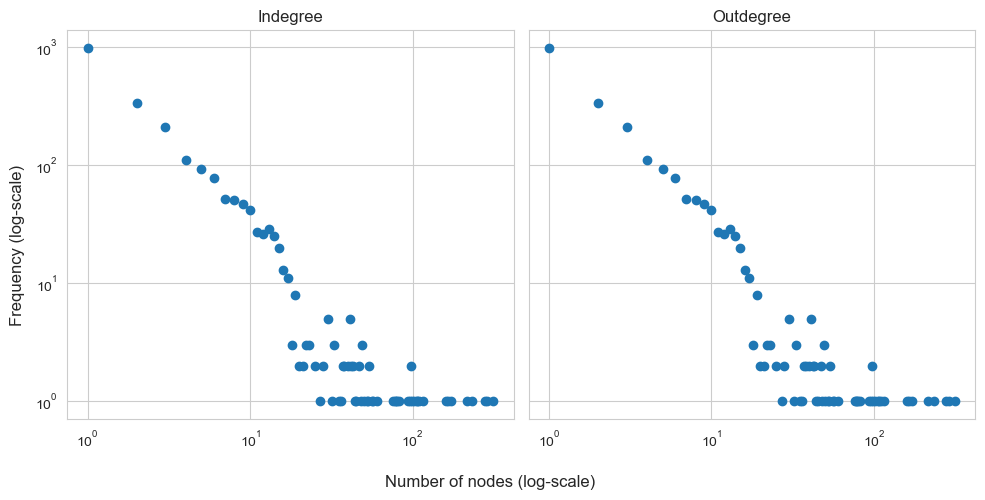

In [8]:
indegree_counts = np.unique([g.degreeIn(node_id) for node_id in g.iterNodes()], return_counts=True)
outdegree_counts = np.unique([g.degreeOut(node_id) for node_id in g.iterNodes()], return_counts=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, tight_layout=True)

ax[0].scatter(indegree_counts[0], indegree_counts[1])
ax[1].scatter(outdegree_counts[0], outdegree_counts[1])

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_yscale("log")

fig.supxlabel("Number of nodes (log-scale)")
fig.supylabel("Frequency (log-scale)")

ax[0].title.set_text("Indegree")
ax[1].title.set_text("Outdegree")

plt.show()

# Question 3.4

In [9]:
scc = nk.components.StronglyConnectedComponents(g)
scc.run()

print(f"Number of strongly connected components: ", scc.numberOfComponents())

Number of strongly connected components:  10


In [10]:
wcc = nk.components.WeaklyConnectedComponents(g)
wcc.run()

print(f"Number of weakly connected components: ", wcc.numberOfComponents())

Number of weakly connected components:  10


In [11]:
largest_scc_nodes = scc.getComponents()[tuple(sorted(scc.getComponentSizes().items(), key=lambda item: item[1], reverse=True))[0][0]]
largest_scc = nk.graphtools.subgraphFromNodes(g, largest_scc_nodes)

print(f"Number of nodes in largest strongly connected component: ", largest_scc.numberOfNodes())
print(f"Number of edges in largest strongly connected component: ", largest_scc.numberOfEdges())

Number of nodes in largest strongly connected component:  2217
Number of edges in largest strongly connected component:  12836


# Question 3.5

For how to handle directionality, refer https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html

In [12]:
print("Average local clustering coefficient: ", nk.globals.clustering(g))

Average local clustering coefficient:  0.07239642143663684


# Question 3.6

In [13]:
largest_wcc_nodes = wcc.getComponents()[tuple(sorted(wcc.getComponentSizes().items(), key=lambda item: item[1], reverse=True))[0][0]]
largest_wcc = nk.graphtools.subgraphFromNodes(g, largest_wcc_nodes)

In [14]:
# APSP = nk.distance.APSP(largest_wcc) 
# APSP.run()

# Question 3.7

In [4]:
centrality = {}

In [ ]:
# Degree centrality
centrality["degree"] = nk.centrality.DegreeCentrality(g)
centrality["degree"].run()

In [5]:
# Eigenvector centrality
centrality["eigenvector"] = nk.centrality.EigenvectorCentrality(g)
centrality["eigenvector"].run()

In [1]:
# Pagerank centrality
centrality["pagerank"] = nk.centrality.PageRank(g)
centrality["pagerank"].run()

NameError: name 'nk' is not defined